# KNN
# Etapa 1: importe os dados necessários e verifique os recursos.


In [ ]:
#Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
url = "iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

Para ver como o conjunto de dados realmente se parece, execute o seguinte comando:
Converte os dados em um frame do pandas

In [15]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Pre-processamento
#dividir nosso conjunto de dados em seus atributos e rótulos
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
#A variável x contém as quatro primeiras colunas do conjunto de dados (ou seja, atributos) enquanto y contém os rótulos.


# Etapa 2: Divida os dados e Treine o modelo.
Treinar e testar os mesmos dados não é uma abordagem ideal;
portanto, dividimos os dados em duas partes: conjunto de treinamento e conjunto de testes.

Usamos a função 'train_test_split' para dividir os dados.
O parâmetro opcional 'test_size' determina a porcentagem de divisão. O parâmetro 'random_state' divide os dados da mesma maneira toda vez que você executa.

Como treinamos e testamos diferentes conjuntos de dados, a precisão do teste resultante será uma estimativa melhor de quão bem o modelo provavelmente terá desempenho em dados não vistos.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Gradiente Descente
A Descida do Gradiente é uma ferramenta padrão para otimizar funções complexas iterativamente dentro de um programa de computador.Seu objetivo é: dada alguma função arbitrária, encontrar um mínimo. O algoritmo converge mais rapidamente com os recursos normalizados.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento
O primeiro passo é importar a KNeighborsClassifierclasse da sklearn.neighborsbiblioteca.
Na segunda linha, essa classe é inicializada com um parâmetro, ie n_neigbours.
Este é basicamente o valor para o K. Não existe um valor ideal para K e é selecionado após teste e avaliação; no entanto, para começar, 5 parece ser o valor mais comumente usado para o algoritmo KNN.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# A etapa final é fazer previsões em nossos dados de teste.
#Para fazer isso, execute o seguinte script:
y_pred = classifier.predict(X_test)  

# Avaliando o algoritmo
Para avaliar o algoritmo usamos a matriz de confusão, precision, recall e f1

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Os resultados mostram que nosso algoritmo KNN conseguiu classificar todos os 30 registros no conjunto de testes com:
* 100% de precisão para  Iris-setosa
* 89% de precisaão para Iris-versicolor
* 89% de precisão para Iris-virginica


# Comparando a taxa de erro com o valor K

Na seção de treinamento e previsão, dissemos que não há como saber de antemão qual o valor de K que produz os melhores resultados na primeira tentativa.
Escolhemos aleatoriamente 5 como o valor de K e isso resulta em 100% de precisão.
Para outros valores o que pode ser feito ?
Nesta seção, traçaremos o erro médio para os valores previstos do conjunto de testes para todos os valores de K entre 1 e 40.

In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

O script acima executa um loop de 1 a 40.
Em cada iteração, o erro médio para os valores previstos do conjunto de testes é calculado e o resultado é anexado à lista error.
O próximo passo é plotar os valores do vetor de erro em relação a K.

Text(0, 0.5, 'Erro médio')

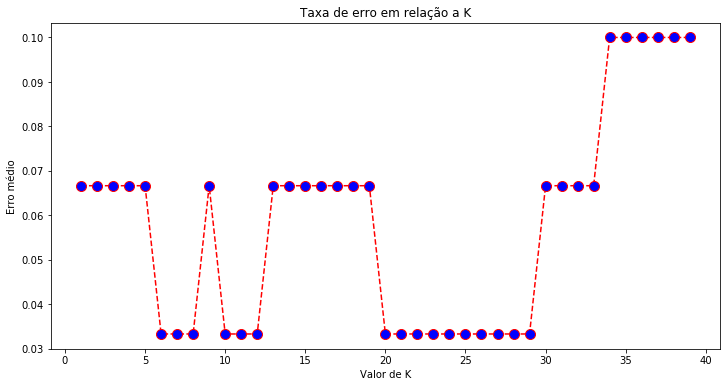

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro em relação a K')
plt.xlabel('Valor de K')
plt.ylabel('Erro médio')